# Analizando postagens do Hacker News

## Introdução

Neste projeto, nós vamos analisar dois tipos de posts do [Hacker News](https://news.ycombinator.com/), um site que reúne notícias, artigos e discussões sobre tecnologia, programação, empreendedorismo e outros assuntos relacionados.

Os tipos de posts que nós vamos examinar são os Ask HN e os Show HN, posts onde os usuários fazem uma pergunta específica para a comunidade ou então onde eles mostram um projeto, produto ou algo interessante para a comunidade, respectivamente.

Em nossa análise, queremos responder as seguintes perguntas:

- Qual tipo de post costuma receber mais comentários?
- O horário do post influencia o número de interações?
- Existem horários em que há maior concorrência na visibilidade de uma postagem?
- Existem horários melhores para tirar dúvidas com a comunidade? 
- A comunidade tem mais interesse postagens do tipo ASK ou SHOW?
- Existem horários melhores para mostrarmos algo para a comunidade?

Aqui estou usando um conjunto de dados baixados do [Kaggle](https://www.kaggle.com/). O CSV que estou usando é um subconjunto feito por mim do original, no qual estou apenas com posts cujo número de comentários é maior que zero e os tipos de post são Ask HN e Show HN. O original pode ser baixado [aqui](https://www.kaggle.com/datasets/santiagobasulto/all-hacker-news-posts-stories-askshow-hn-polls).


## Lendo os dados

Vamos importar nosso módulo que possui algumas funções que usaremos durante o projeto:

In [1]:
import auxiliar as aux

Agora vamos abrir e ler nossos dados:

In [2]:
import csv

f = open('hn_filtered.csv', encoding='utf-8')
hn = list(csv.reader(f))
header_hn = hn[0]
hn = hn[1:]

Vamos agora ver o cabeçalho e também algumas linhas para termos uma ideia de como estão nossos dados. Vejamos também o tamanho da nossa amostra:

In [3]:
print(header_hn)
print("\n")
print(hn[-10:])
print("\n")
print(len(hn))

['Object ID', 'Title', 'Post Type', 'Author', 'Created At', 'URL', 'Points', 'Number of Comments']


[['35477804', 'Show HN: Spellwise – GPT-Powered iOS Keyboard', 'show_hn', 'teamsayana', '2023-04-07 03:45:20', 'https://testflight.apple.com/join/JGbNKD5R', '1', '6.0'], ['35477856', 'Show HN: AnyMod – High-Performance LLM API for All Open Models', 'show_hn', 'generallm', '2023-04-07 03:53:20', 'https://anymod.ai/', '1', '2.0'], ['35477944', 'Ask HN: Making the jump from development studio to big tech?', 'ask_hn', 'mrdependable', '2023-04-07 04:09:23', '', '4', '2.0'], ['35478321', 'Ask HN: Are you afraid to use the Android contacts?', 'ask_hn', 'MzHN', '2023-04-07 05:22:48', '', '7', '2.0'], ['35478512', 'Ask HN: Where to learn about semiconductors design?', 'ask_hn', 'kovezd', '2023-04-07 05:54:38', '', '4', '2.0'], ['35478993', 'Ask HN: Best ways to extract clips from streaming services', 'ask_hn', 'bryanrasmussen', '2023-04-07 07:11:08', '', '1', '1.0'], ['35479279', 'Ask HN: How di

Aqui podemos observar que temos um total de 179.637 posts que são do tipo Ask HN ou Show HN e que têm pelo menos um comentário.

## Separando ASK e SHOW

### ASK HN

Vamos usar uma compreensão de listas para filtrar os posts que nos interessam e ver o tamanho da nossa lista para saber quantas postagens temos:

In [4]:
ask_hn = [post for post in hn if post[2] == 'ask_hn']
print(len(ask_hn))

120171


Temos um total de 120.171 postagens cujo foco é fazer perguntas para a comunidade.

### SHOW HN

Vamos usar uma compreensão de listas para filtrar os posts que nos interessam e ver o tamanho da nossa lista para saber quantas postagens temos:

In [5]:
show_hn = [post for post in hn if post[2] == 'show_hn']
print(len(show_hn))

59466


Temos um total de 59.466 posts do tipo SHOW, um número bem menor do que o de posts do tipo ASK.

Apenas por curiosidade: nós tínhamos um total de 1.137.666 posts com pelo menos um comentário no arquivo original, sendo que o número de linhas no arquivo originalmente era de 3.885.799. Os outros tipos de posts que também existem são Story e Poll, que somam o restante.

## Média de comentários

### ASK vs. SHOW:

Vamos usar a nossa função anterior para calcular a média de comentários nas nossas listas de posts do tipo ASK e SHOW, passando como argumento a nossa lista e a coluna onde o número de comentários está:

In [6]:
media_ask = aux.calcula_media(ask_hn, 7)
print("Média de comentários ASK:", media_ask)
media_show = aux.calcula_media(show_hn, 7)
print("Média de comentários SHOW:", media_show)

Média de comentários ASK: 15.56
Média de comentários SHOW: 12.32


Temos uma média de 15,56 comentários por post do tipo ASK e 12,32 por post do tipo SHOW.

Aqui podemos observar que, apesar de a diferença não ser tão grande em valores absolutos, temos uma média significativamente maior de comentários nos posts do tipo ASK. Vejamos:

In [7]:
dif_percent = round(((media_ask - media_show) / media_show) * 100, 2)
print(dif_percent, "%")

26.3 %


Essa média 26.3% maior nas postagens do tipo ASK faz sentido. Como estamos falando de perguntas para a comunidade, é de se esperar que elas gerem mais engajamento com os usuários respondendo as dúvidas.

## ASK: comentários e horários

Queremos contar o número de postagens em todos os nossos dados agrupados pela hora do dia em que foram feitas para entendermos quais os horários mais ativos da comunidade e depois analisarmos isso junto com a média de comentários que as postagens recebem, também agrupados por hora do dia.

Para isso, vamos criar e imprimir uma tabela de frequência com a nossa função que vai retornar um dicionário ordenado crescentemente nas keys com o formato de hora dos nossos dados:

In [8]:
post_por_hora_ask = aux.tabela_frequencia_hora(ask_hn)
aux.tabela_dicionario(post_por_hora_ask, "Hora", "Postagens")

Hora	Postagens
00	4379
01	3982
02	3886
03	3689
04	3433
05	3178
06	3111
07	2974
08	3245
09	3408
10	3623
11	3951
12	4639
13	5270
14	6361
15	7538
16	7649
17	7578
18	7540
19	7143
20	6766
21	6354
22	5547
23	4927


Vamos colocar essas informações em um gráfico de barras para ficar mais fácil de visualizar:

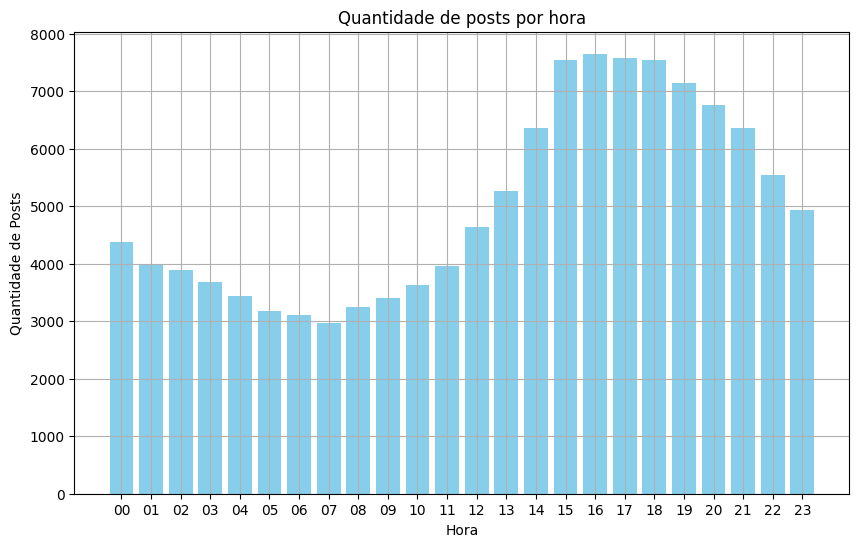

In [9]:
aux.grafico_barra_dicionario(post_por_hora_ask, 'Hora', 'Quantidade de Posts', 'Quantidade de posts por hora')

Aqui podemos observar que a atividade aumenta a partir das `15:00` e se mantém alta até cerca das `18:00`. A partir desse momento, o número de postagens diminui. Seu mínimo fica entre `06:00` e `08:00` da manhã, quando volta a crescer até alcançar seu máximo no intervalo mencionado anteriormente. Esses valores são para o número total de postagens.

## ASK: média de comentários e horários

Queremos agora calcular a média de comentários que cada postagem recebeu, por hora ao longo do dia, nos nossos dados. Para isso, vamos criar e imprimir a tabela de frequência com a soma dos comentários por hora ao longo do dia e dividirmos pelo número de postagens que já temos no nosso dicionário usado anteriormente:

In [10]:
media_comentario_hora_ask = aux.tabela_frequencia_hora(ask_hn, 7)
media_comentario_hora_ask = {hora: round(media_comentario_hora_ask[hora] / post_por_hora_ask[hora], 2) for hora in media_comentario_hora_ask}
aux.tabela_dicionario(media_comentario_hora_ask, "Hora", "Média de comentários")

Hora	Média de comentários
00	11.38
01	12.55
02	13.1
03	13.17
04	13.21
05	12.89
06	14.51
07	14.96
08	16.48
09	15.84
10	17.94
11	20.93
12	19.99
13	22.26
14	18.87
15	26.14
16	19.34
17	14.23
18	13.36
19	12.1
20	11.73
21	11.06
22	11.55
23	11.28


Vamos colocar essas informações em um gráfico de barras para facilitar a visualização:

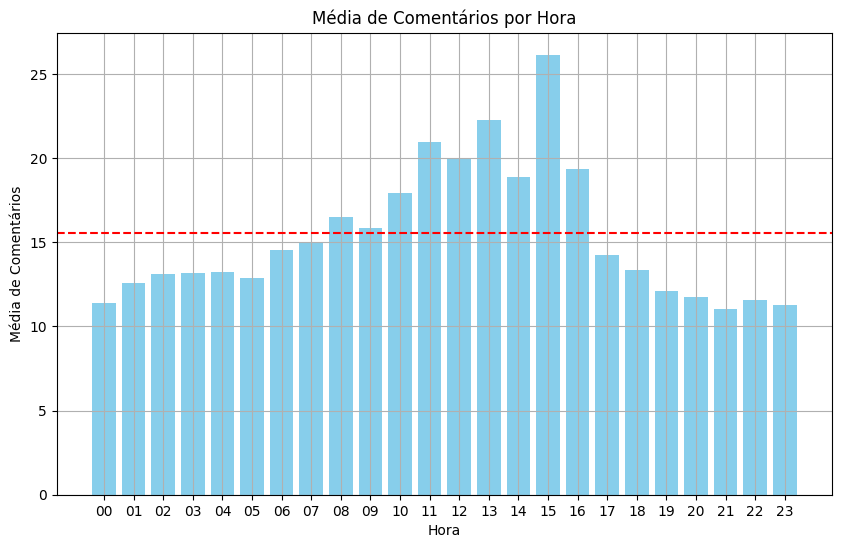

In [11]:
aux.grafico_barra_dicionario(media_comentario_hora_ask, 'Hora', 'Média de Comentários', 'Média de Comentários por Hora', media_ask)

Aqui podemos ver que o período entre `15:00` e `18:00` é o que tem o maior número de postagens, mas a média de interação nos posts não segue necessariamente o mesmo padrão. A média de comentários mais alta ocorre às `15:00` (26,14), mas mesmo com a baixa de atividade pela manhã, esse período do dia tende a ter uma média um pouco mais alta do que o restante, com os segundos maiores valores às `11:00` (20,93) e às `13:00` (22,26).

Por outro lado, as horas com as menores médias de comentários são `21:00` (11,06), `20:00` (11,73) e `19:00` (12,10). Essas horas coincidem com o período de queda da atividade.

## SHOW: comentários, médias e horários

De forma semelhante à análise anterior, temos:

Hora	Postagens
00	1603
01	1325
02	1134
03	1103
04	1034
05	998
06	1122
07	1432
08	1603
09	1720
10	1989
11	2416
12	3154
13	3800
14	4281
15	4682
16	4620
17	4283
18	3870
19	3386
20	3096
21	2616
22	2343
23	1856


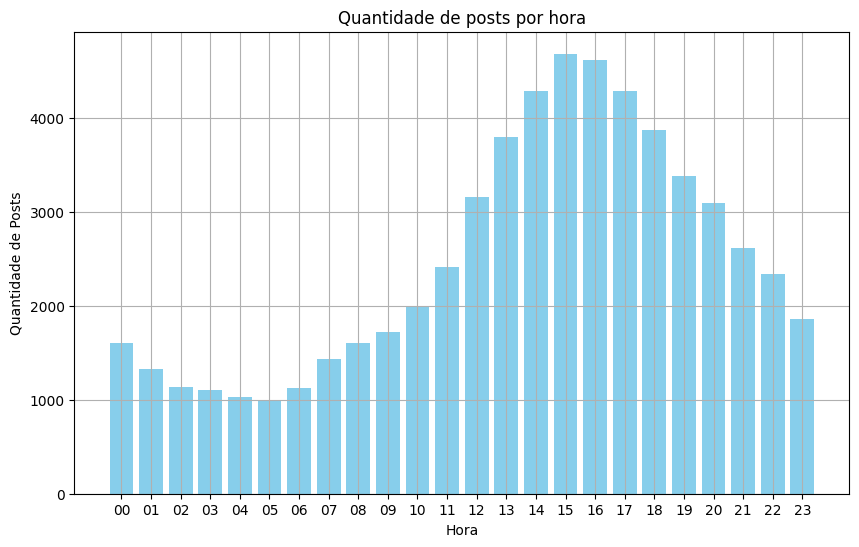

Hora	Média de comentários
00	11.7
01	12.03
02	11.88
03	11.09
04	12.0
05	9.88
06	10.4
07	12.57
08	11.63
09	12.67
10	12.07
11	14.32
12	14.41
13	14.16
14	13.18
15	13.24
16	13.19
17	12.38
18	12.7
19	11.39
20	10.87
21	9.98
22	10.0
23	10.12


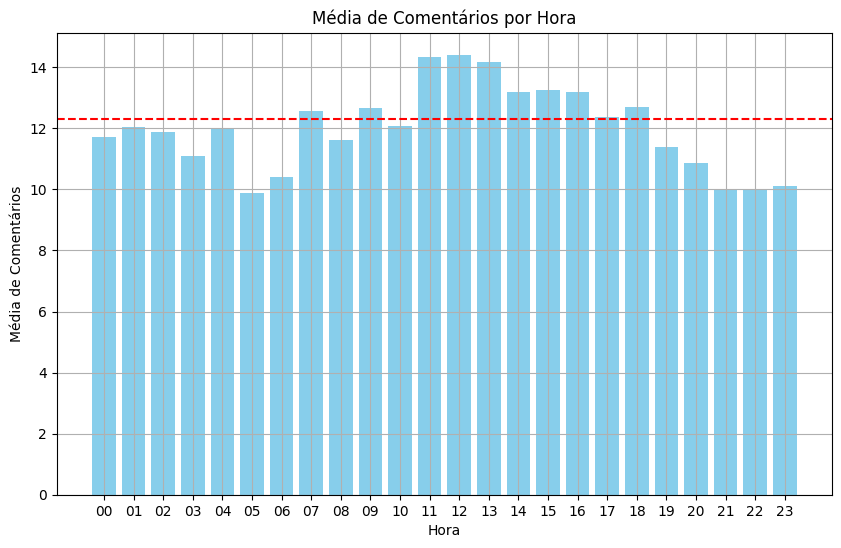

In [12]:
post_por_hora_show = aux.tabela_frequencia_hora(show_hn)
media_comentario_hora_show = aux.tabela_frequencia_hora(show_hn, 7)
media_comentario_hora_show = {hora: round(media_comentario_hora_show[hora] / post_por_hora_show[hora], 2) for hora in media_comentario_hora_show}
aux.tabela_dicionario(post_por_hora_show, "Hora", "Postagens")
aux.grafico_barra_dicionario(post_por_hora_show, 'Hora', 'Quantidade de Posts', 'Quantidade de posts por hora')
aux.tabela_dicionario(media_comentario_hora_show, "Hora", "Média de comentários")
aux.grafico_barra_dicionario(media_comentario_hora_show, 'Hora', 'Média de Comentários', 'Média de Comentários por Hora', media_show)


Aqui podemos observar que os posts do tipo SHOW têm um padrão de atividade não muito diferente dos posts do tipo ASK. Os posts do tipo SHOW são mais frequentes entre as `13:00` e as `17:00`, com um pico às `15:00` (4.682). Depois das `18:00`, a atividade diminui muito e chega ao seu mínimo às `05:00` (998). Esses valores são para o número total de posts.

A média de comentários por post do tipo SHOW também muda ao longo do dia, mas não acompanha exatamente o mesmo padrão dos posts. A média de comentários mais alta ocorre às `12:00` (14,41), seguida pelas `11:00` (14,32), `13:00` (14,16) e `15:00` (13,24). As médias de comentários mais baixas são às `05:00` (9,88), `21:00` (9,98) e `22:00` (10,00).

Comparando com os posts do tipo ASK, podemos notar algumas diferenças e semelhanças. Os posts do tipo ASK têm uma frequência mais concentrada entre as `15:00` e as `18:00`, enquanto os posts do tipo SHOW têm uma frequência mais distribuída entre as `13:00` e as `17:00`. Os posts do tipo ASK também têm uma média de comentários mais alta do que os posts do tipo SHOW, indicando que eles geram mais interação e discussão. No entanto, ambos os tipos de posts têm um padrão de queda de atividade e interação depois das `18:00`, sugerindo que esse horário é menos favorável para publicar no hackernews.

## SHOW: Pontuação média

Vamos analisar agora a coluna `Points`. Os pontos nas postagens do Hacker News são uma medida de popularidade e relevância do conteúdo, demonstrando o interesse e satisfação dos usuários com o conteúdo.

### ASK vs. SHOW:

Queremos saber qual tipo de postagem costuma receber mais pontos: as postagens do tipo ASK HN ou as do tipo SHOW HN? Vamos calcular a média de pontos por tipo de postagem:

In [13]:
media_pontos_ask = aux.calcula_media(ask_hn, 6)
media_pontos_show = aux.calcula_media(show_hn, 6)
print("Média de pontos das postagens ASK:", media_pontos_ask)
print("Média de pontos das postagens SHOW:", media_pontos_show)

Média de pontos das postagens ASK: 15.99
Média de pontos das postagens SHOW: 30.41


As postagens do tipo SHOW recebem muito mais pontos do que as postagens do tipo ASK, mostrando que elas são mais admiradas e valorizadas pela comunidade do hackernews. Isso pode ser porque as postagens do tipo SHOW costumam mostrar projetos, produtos ou algo interessante que os usuários criaram ou descobriram, enquanto as postagens do tipo ASK são mais voltadas para fazer perguntas ou pedir ajuda. Assim, as postagens do tipo SHOW podem ter um maior potencial de impressionar, inspirar ou divertir os leitores, ganhando mais pontos.

### Pontuação média das postagens ao longo do dia:

Os próximos passos são semelhantes aos anteriores onde calculamos as médias, mas agora para os pontos. Vejamos:

Hora	Média de pontos
00	30.14
01	30.09
02	27.67
03	26.43
04	29.02
05	23.8
06	25.15
07	29.62
08	27.24
09	29.99
10	29.08
11	35.81
12	35.45
13	35.41
14	32.08
15	33.29
16	32.91
17	30.71
18	32.17
19	28.22
20	27.53
21	24.26
22	24.93
23	24.46


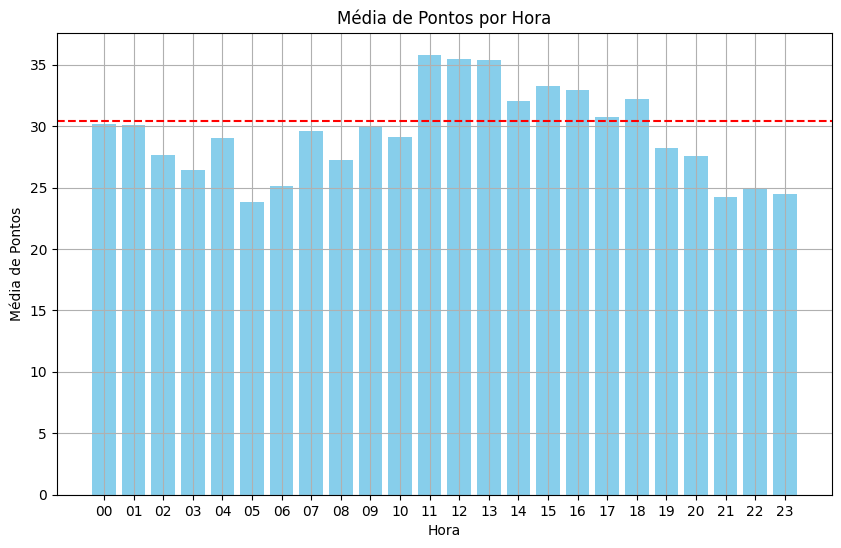

In [14]:
ponto_por_hora_show = aux.tabela_frequencia_hora(show_hn, 6)
media_pontos_por_hora_show = {hora: round(ponto_por_hora_show[hora] / post_por_hora_show[hora], 2) for hora in ponto_por_hora_show}
aux.tabela_dicionario(media_pontos_por_hora_show, "Hora", "Média de pontos")
aux.grafico_barra_dicionario(media_pontos_por_hora_show, 'Hora', 'Média de Pontos', 'Média de Pontos por Hora', media_pontos_show)

A média de pontos por post do tipo SHOW muda bastante ao longo do dia, mas há alguns horários que se sobressaem por terem médias bem acima da média geral (30,41). Os horários com as maiores médias de pontos são `11:00` (35,81), `12:00` (35,45), `13:00` (35,41) e `15:00` (33,29). Esses horários coincidem com o período de maior frequência de posts do tipo SHOW, indicando que há uma maior competição e também uma maior valorização pelos posts nesse intervalo.

## Conclusão

- Os posts do tipo ASK costumam receber mais comentários do que os posts do tipo SHOW, indicando que eles geram mais interação e discussão na comunidade do hackernews. A média de comentários por post do tipo ASK é de 15,56, enquanto a média de comentários por post do tipo SHOW é de 12,32.
- O horário do post influencia o número de interações, tanto em termos de quantidade de posts quanto de média de comentários e pontos. Há alguns horários que se destacam por terem mais atividade e interação do que outros, dependendo do tipo de post.
- Para os posts do tipo ASK, os horários com mais posts são entre as `15:00` e as `18:00`, sendo esse o período de maior disputa pela visibilidade de uma postagem. No entanto, o horário com a maior média de comentários é às `15:00` (26,14), indicando que esse é o melhor horário para fazer perguntas à comunidade. Outra opção é entre os horários 10:00 e 12:00, que têm um número de interações acima da média e ainda têm poucas postagens sendo criadas, indicando um horário ativo e com baixa concorrência de atenção dos outros usuários. Os horários com as menores médias de comentários são a partir das `19:00`, sugerindo que esse é o pior horário para publicar uma pergunta no hackernews. A madrugada também não é um horário recomendado, a atividade tende a crescer somente no início da manhã, a partir das `06:00`
- Para os posts do tipo SHOW, podemos ver que o intervalo entre `11:00` e `15:00` tem os melhores índices de média de comentários e de pontos recebidos, mostrando que é o horário em que a comunidade está mais ativa para interagir, se interessar e gerar maior visibilidade às postagens. No entanto, há uma intersecção com os horários em que há mais posts sendo feitos, compreendido entre `13:00` e `17:00`. O usuário pode aproveitar os intervalos de `11:00` e `12:00` para fazer um post e ter menos concorrência de atenção (inclusive esses horários têm as maiores médias, mesmo entre `11:00` e `15:00`). Depois das `18:00` e também no início da manhã não são bons horários para apresentar conteúdo à comunidade.